In [100]:
from glob import glob
import json
from numpy import mean, std, amax, amin
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pprint import pprint
from random import sample


import texte

In [101]:
with open("LGERM.json", encoding="utf-8") as f:
    LGERM = json.load(f)
mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


In [102]:
sample_mode = True

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = list(texte.corpora(files))


 46%|████▋     | 93/200 [00:00<00:00, 115.75it/s]

Empty file: self.path = 'Corpus/Mazarinades/1201-1300/Moreau1240_GALL.xml'


100%|██████████| 200/200 [00:01<00:00, 139.11it/s]


In [103]:
collection_textes[0].texte

[['ARRESTS',
  'DV CONSEIL',
  'DEEA DPV o',
  'meril pour le',
  'pnenen des lenle',
  'ſir’ rploite de l vile de p iuie',
  'r eelen',
  'nt le vingt- ſixieſme Iuiller',
  'mil ſix cens quarente-neuf.',
  'r',
  'et lnnniture u one',
  'e e e o e .',
  'dui n le le e e eunenl',
  'Auec Priuilege de ſa Majeſté.'],
 ['3',
  'EXTRAAICT DES REGISTRE',
  'du onſeil d’éftat.',
  'QV ce qui a eſté repreſenté au Royeſtant',
  'en ſon Conſeil par les Preuoſt des Mr',
  ' chands &amp;Eſcheuins de la Ville de Panis,',
  'Quele fonds des Hui&amp;t millions deliures',
  's des Rentes, conſtituées ſur les Tailles,',
  'Petites Rentes, &amp; Receptes Generales, eſtant aſſi',
  ' gnées ſur les Generalite d’Orleans &amp; Moulins, les',
  'Receueurs &amp; Payeurs d’icelles ont fair iuſques aà pre',
  'ſent toutes les diligences neceſſaires pour le recou',
  'urement des demeis, tant contre les Rceueurs Gene',
  'raux &amp; Particuliers deſdites Generalitez, que contre',
  'ceux qui en ont eſté char

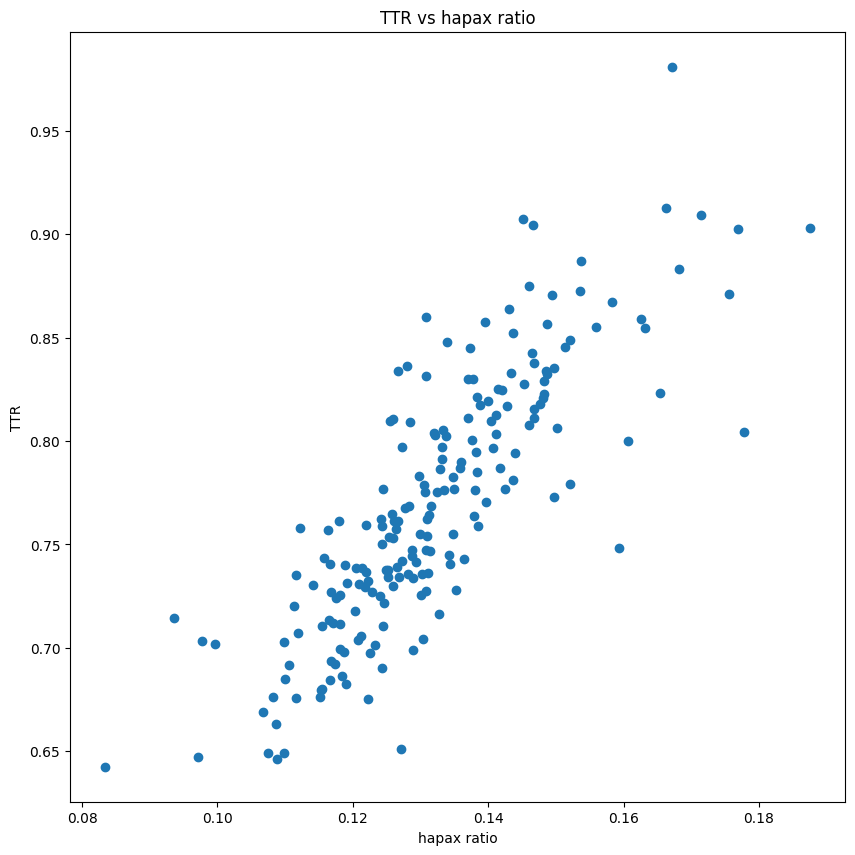

In [104]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

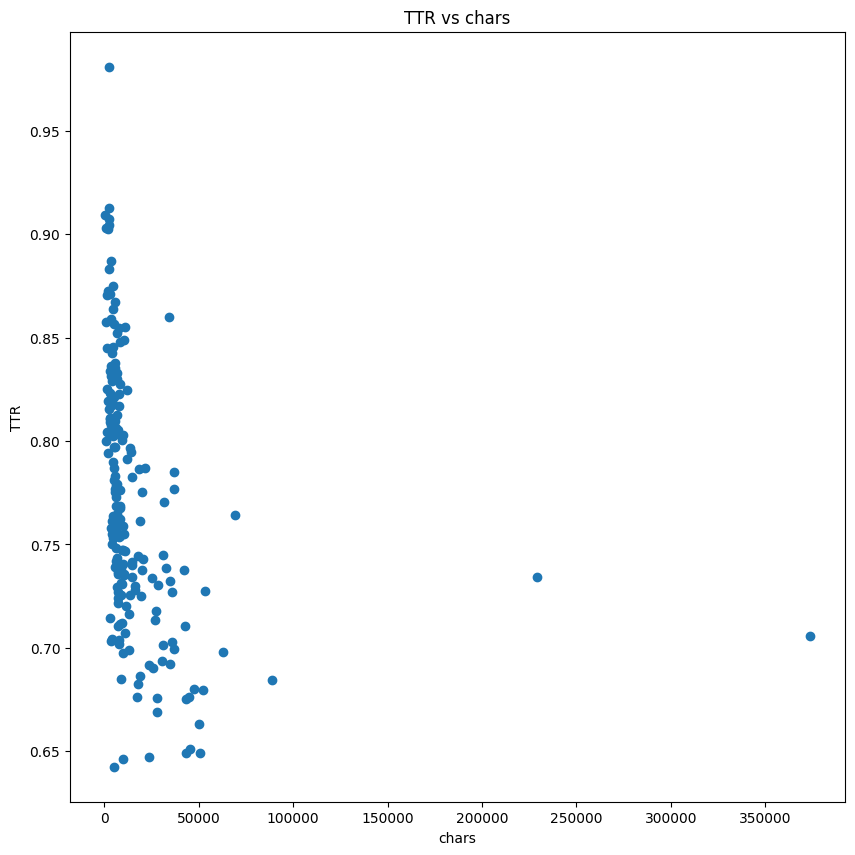

In [105]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

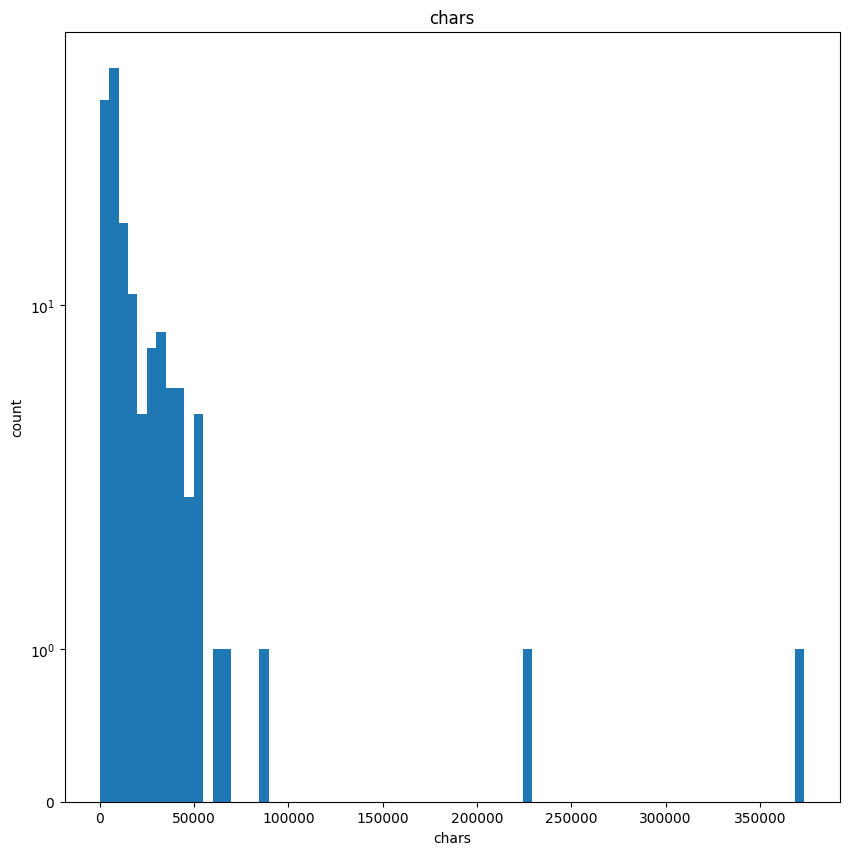

In [106]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

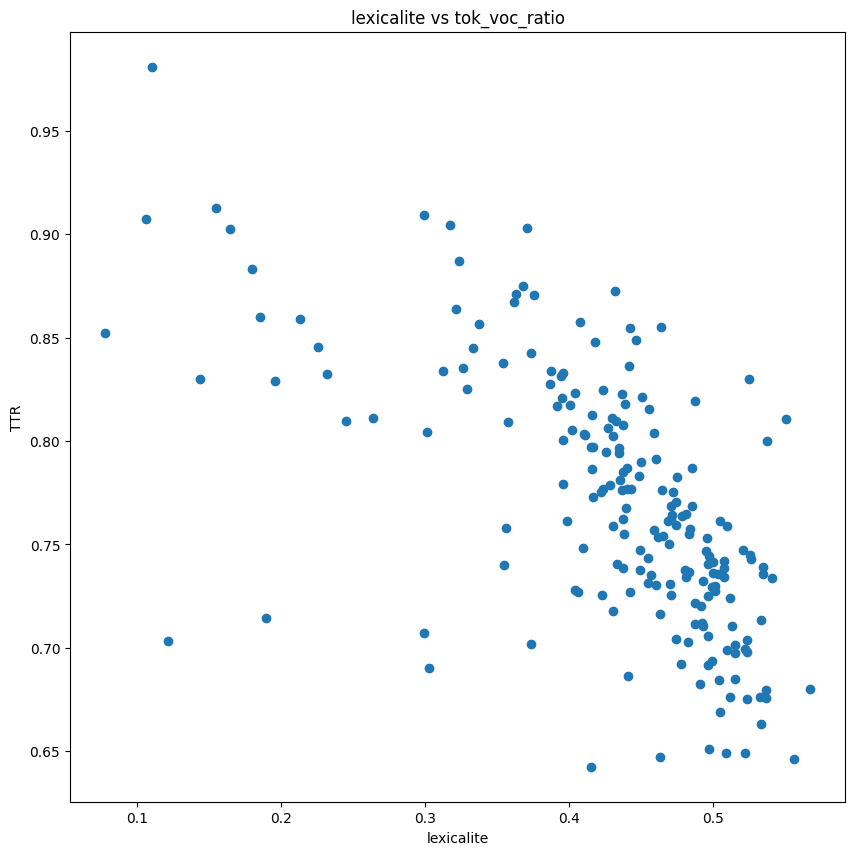

In [107]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [108]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"] for txt in collection_textes]
len(x)/ len([e for e in x if e == "corrected"])

1.0

In [109]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-10-25', '@who': 'AB'},
 'dates': {'#text': '25 octobre 2022',
           '@type': 'file_creation',
           '@when': '2022-10-25'},
 'form': 'prose',
 'genre': ['texte officiel', 'arrêt'],
 'handwritten_note': True,
 'illustration': False,
 'subject': ['Fiscalité', "Rentes de l'Hôtel de Ville"],
 'table_of_content': False,
 'titre': 'Arrêts du conseil d’État du roi portant réglement général\n'
          '          pour le paiement des rentes constituées sur l ’hôtel de '
          'ville de Paris, registrés, en\n'
          '          parlement le vingt-sixième juillet mil six cens '
          'quarante-neuf.'}


In [110]:
txt.ttr, txt.lexicalite

(0.730586270705586, 0.4603266710054017)

In [111]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

In [112]:
stats("ttr")


prose: 0.760


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [ ]:
stats("hapax_ratio")

In [ ]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel("f{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


In [ ]:
stats2("creation", "hapax_ratio")

In [ ]:
stats2("creation", "ttr")

In [ ]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")